# Capítulo 7. Algoritmos y Fundamentos Probabilísticos con Python 

### 7.1 ¿Qué es la Inteligencia Ariticial (IA)? Una Perspectiva para Economistas

En la actualidad, la IA se encuentra integrada en aplicaciones cotidianas que afectan directa o indirectamente la economía: desde algoritmos de recomendación en plataformas de consumo, hasta modelos de predicción macroeconómica o sistemas automatizados de inversión financiera. Para los economistas, comprender el concepto de IA no solo representa una ventaja técnica, sino una necesidad estratégica.

La Inteligencia Artificial es una disciplina que estudia y desarrolla teorías, técnicas y sistemas aplicados que se usan para simular y extender la inteligencia humana. De forma más general, podemos definirla como la capacidad de una máquina o sistema computacional para realizar tareas que normalmente requerirían inteligencia humana, como el razonamiento, la toma de decisiones, el reconocimiento de patrones, el aprendizaje a partir de la experiencia, o la comprensión del lenguaje natural. Las disciplinas que componen la IA son: 

- La Ciencia Cognitiva
- La Lingüística 
- La Psicología 
- Las Ciencias Computacionales 
- La Filosofía 
- La Lógica
- La Neurociencia

Así mismo, la IA se puede clasificar en dos grandes categorías:
 
- **IA débil**: se refiere a sistemas diseñados para realizar tareas específicas. Este tipo de sistemas pueden parecer inteligentes, pero en realidad requieren de la intervención humana a diferentes niveles. 
- **IA fuerte**: es una forma de inteligencia que puede igualar o superar la inteligencia humana en cualquier tarea. Aunque aún no existe en la práctica, es un horizonte teórico que plantea interesantes desafíos filosóficos, como la automatización de la toma de decisiones a gran escala.


### 7.2 Qué es el Aprendizaje Automático (ML)? Tipos Principales (Supervisado, No Supervisado, Refuerzo)

El aprendizaje automático es una subárea dentro de la IA, y puede definirse como “el conjunto de métodos computacionales que permiten que una máquina aprenda a realizar tareas a partir de datos, sin ser programada de forma explícita”.  A diferencia de los algoritmos tradicionales donde se programan instrucciones de forma explícita y las reglas se determinan manualmente, los modelos de ML aprenden a partir de muestras de datos, y detectan relaciones no lineales, dinámicas ocultas o segmentaciones en los datos que serían difíciles de capturar mediante métodos analíticos convencionales. Este enfoque es especialmente útil en economía, donde los sistemas son complejos, las variables están interrelacionadas y los modelos teóricos muchas veces no capturan completamente la realidad observada.

Los modelos de ML se pueden clasificar en las siguientes categorías: 

- Supervisados: se entrenan con un conjunto de datos que incluye tanto las variables características (x) como la(s) variable(s) objetivo (y). El objetivo es aprender una función que relacione las características con la(s) variable(s) objetivo.
    - Clasificación: Se utiliza cuando la variable objetivo es categórica. El modelo aprende a asignar cada observación a una clase. Ejemplo: Predecir si un cliente aprobará o no un crédito (sí/no).
    - Regresión: Se utiliza cuando la variable objetivo es continua. El modelo predice un valor numérico. Ejemplo: Estimar el precio futuro de un activo financiero.
- No supervisados: no hay un entrenamiento previo con los datos, es decir, que, a diferencia del supervisado, el modelo no tiene un conjunto de datos de entrenamiento etiquetados y, en su lugar, tiene que identificar patrones y estructuras en los datos por sí mismo.
    - Agrupación en clústeres: los algoritmos detrás de estos modelos se basan en la suposición de que es posible agrupar las muestras en base a sus similitudes. Por ejemplo, se puede utilizar para agrupar clientes en diferentes categorías basadas en sus patrones de compra.
- Aprendizaje por Refuerzo: en inglés “Reinforcement Learning” (RL) es un modelo que aprende a partir de la interacción con el “medio ambiente”, es decir, toma acciones y ajusta esas acciones basado en un sistema de recompensas. Se utiliza en entornos secuenciales donde las acciones afectan estados futuros. Ejemplo: Un sistema automatizado de trading que ajusta su estrategia en tiempo real según el retorno obtenido.

A diferencia de los enfoques econométricos tradicionales, que suelen partir de modelos teóricos explícitos, el ML parte directamente de los datos para aprender reglas, patrones o funciones sin necesidad de que estas estén predefinidas. 

### 7.3 Introducción a la Biblioteca scikit-learn (sklearn) 

En el capítulo 7 vimos algunos ejemplos de regresión lineal (OSL) utilizando librerías como “statsmodels” y “scipy” para un análisis econométrico clásico. Con esto, pudimos realizar una regresión lineal OLS (mínimos cuadrados ordinarios) y obtener estadísticas detalladas (valores p, errores estándar etc.), lo cual es fundamental para interpretaciones teóricas y pruebas de hipótesis, aspectos clave en la investigación económica tradicional.

Sin embargo, cuando el objetivo se desplaza hacia la predicción, la automatización o la aplicación práctica de modelos ML, la librería “scikit-learn” ofrece ventajas significativas:

- Flujo modular y reproducible: scikit-learn permite construir pipelines (flujos de trabajo) en los que se pueden encadenar tareas de preprocesamiento, entrenamiento, validación y predicción de forma estructurada y escalable.
- Validación automática: cuenta con funciones para dividir los datos y evaluar el modelo con técnicas como “K-fold cross-validation", lo cual mejora la evaluación fuera de muestra.
- Escalabilidad y flexibilidad: se pueden integrar diferentes algoritmos de regresión (Ridge, Lasso, SVR, etc.) con la misma interfaz, y ajustar hiperparámetros fácilmente.
- Preprocesamiento avanzado: Ofrece herramientas robustas para estandarización, codificación de variables, manejo de valores faltantes, etc.
- Orientado a predicción: A diferencia de “statsmodels”, que es más interpretativo, scikit-learn está orientado a rendimiento predictivo y aplicaciones prácticas.

A continuación, retomamos el ejemplo de la sección 7.7, modelando el PIB per cápita en función de patentes, pero ahora usando scikit-learn para una regresión lineal. 


##### **Ejemplo: Regresión Lineal con scikit-learn**

El siguiente código replica la regresión lineal OLS del capítulo 7 usando scikit-learn, con un conjunto de datos ampliado a 50 observaciones (1975-2024) para mayor robustez.

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
import numpy as np 

# Generar datos ficticios: PIB per cápita (miles de dólares) y Patentes (miles) 
np.random.seed(42)  

n = 50  
años = list(range(1975, 2025))  
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)  
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2) 
pib_base = 10 + 0.4 * np.arange(n) 
pib_noise = np.random.normal(0, 1.5, n)  
pib_per_capita = pib_base + 3 * patentes + pib_noise  
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2) 

# Crear DataFrame 
data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes }) 

# Variables 
X = data[['Patentes']] # sklearn requiere X en 2D  
y = data['PIB_per_capita'] 

# Crear y ajustar modelo 
model = LinearRegression() 
model.fit(X, y) 

# Predicciones 
y_pred = model.predict(X)  
print(y_pred)

[14.70704729 14.05177739 15.77186087 17.57385308 15.11659097 15.52613466
 18.96630161 17.98339676 16.42713076 18.47484918 17.24621813 17.65576182
 19.21202782 16.09949581 16.83667445 19.13011908 18.80248413 21.34165498
 19.78538898 19.37584529 24.45418698 22.07883361 22.97982972 21.01402003
 22.81601224 24.29036951 22.65219477 25.6009093  24.37227824 25.27327435
 25.19136561 29.61443741 26.99335782 25.68281803 29.12298498 26.25617919
 28.95916751 25.84663551 27.23908403 30.18779856 31.49833835 30.9249772
 30.9249772  31.00688593 29.45061993 31.17070341 31.98979078 34.36514415
 34.11941794 31.08879467]


In [3]:
# Evaluación 
print(f"Intercepto: {model.intercept_:.2f}")  
print(f"Pendiente: {model.coef_[0]:.2f}")  
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")  
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}") 


Intercepto: 9.79
Pendiente: 8.19
R^2 Score: 0.8722
Error cuadrático medio: 4.9357


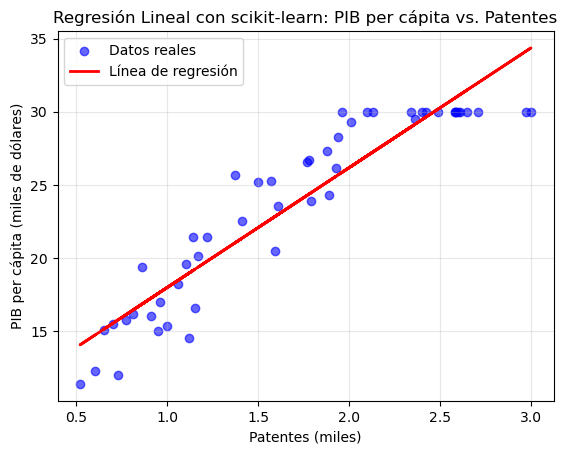

In [4]:
# Visualizar 
plt.scatter(X, y, color='blue', alpha=0.6, label='Datos reales')  
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión') 
plt.title('Regresión Lineal con scikit-learn: PIB per cápita vs. Patentes') 
plt.xlabel('Patentes (miles)')  
plt.ylabel('PIB per cápita (miles de dólares)')  
plt.legend()  
plt.grid(True, alpha=0.3) 

Ahora mostraremos el uso de dos tipos de regresión usados de forma regular en ML (Lasso y Ridge), los cuales son dos métodos de regresión regularizada, diseñados para mejorar el rendimiento de los modelos y evitar el sobreajuste, especialmente cuando hay muchas variables o colinealidad. Ambos agregan una penalización al modelo, pero lo hacen de forma diferente.

- Lasso (Least Absolute Shrinkage and Selection Operator):
    - Utiliza una penalización L1 (suma del valor absoluto de los coeficientes).
    - Tiende a llevar algunos coeficientes exactamente a cero, realizando así una selección de variables.
    - Es útil cuando se sospecha que sólo algunas variables son realmente relevantes.
- Ridge (Regresión de cresta):
    - Utiliza una penalización L2 (suma de los cuadrados de los coeficientes).
    - No elimina variables; en cambio, reduce todos los coeficientes sin hacerlos cero.
    - Útil cuando hay muchas variables correlacionadas.

Los ejemplos a continuación extienden el caso de PIB per cápita vs. patentes, añadiendo una variable adicional (inversión en I+D, en millones de dólares) para ilustrar cómo LASSO y Ridge manejan múltiples predictores.


##### **Ejemplo: LASSO con scikit-learn**

In [6]:
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler  
import numpy as np 

# Generar datos ficticios: PIB per cápita, Patentes, Inversión I+D 
np.random.seed(42)  

n = 50 
años = list(range(1975, 2025))  
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)  
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)  
inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)  
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)  
pib_base = 10 + 0.4 * np.arange(n)  
pib_noise = np.random.normal(0, 1.5, n)  
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise 
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2) 

# Crear DataFrame 
data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id }) 

# Variables 
X = data[['Patentes', 'Inversion_ID']]  
y = data['PIB_per_capita'] 

# Estandarizar variables 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Crear y ajustar modelo LASSO 
model_lasso = Lasso(alpha=0.1) # alpha controla la penalización 
model_lasso.fit(X_scaled, y) 

# Predicciones 
y_pred = model_lasso.predict(X_scaled) 

print(y_pred) 

[16.8569922  16.3382424  17.04720871 18.83487563 18.33590248 18.62021152
 18.87117262 19.06469274 19.10669862 20.63684395 19.20599537 19.79192876
 19.91838736 18.7586784  20.7959017  22.35019498 21.31104825 23.37492816
 22.4326256  21.68321643 24.74070872 24.85648728 24.21169123 24.82168789
 22.54510113 25.98598312 24.9385435  26.04953542 26.03509325 25.00233002
 26.5173685  28.97475683 28.94665869 27.06606917 28.45330212 27.69880087
 30.09268364 28.55153117 28.65805368 30.86617535 31.27855275 31.90297288
 30.81275055 31.32580958 30.82673362 30.90520529 32.78508339 33.92914288
 33.82325703 32.58218457]


In [7]:
# Evaluación 
print("Resultados de LASSO:")  
print(f"Intercepto: {model_lasso.intercept_:.2f}")  
print(f"Coeficientes: {np.round(model_lasso.coef_, 2)}")  
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")  
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}") 


Resultados de LASSO:
Intercepto: 24.97
Coeficientes: [2.39 2.77]
R^2 Score: 0.8087
Error cuadrático medio: 6.3810


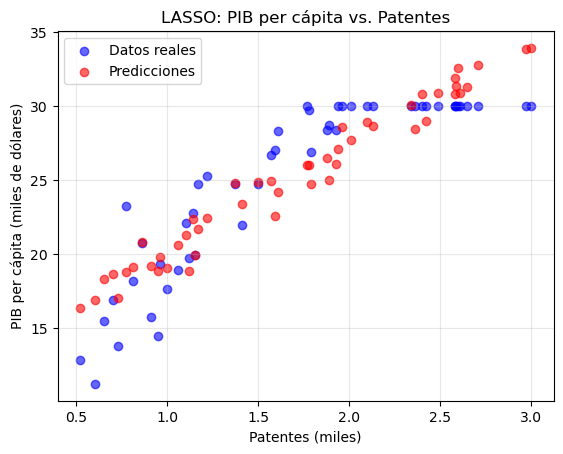

In [8]:
# Visualizar (para Patentes) 
plt.scatter(X['Patentes'], y, color='blue', alpha=0.6, label='Datos reales') 
plt.scatter(X['Patentes'], y_pred, color='red', alpha=0.6, label='Predicciones') 
plt.title('LASSO: PIB per cápita vs. Patentes')  
plt.xlabel('Patentes (miles)')  
plt.ylabel('PIB per cápita (miles de dólares)')  
plt.legend()  
plt.grid(True, alpha=0.3)  
plt.show() 

##### **Ejemplo: Ridge con scikit-learn**

In [10]:
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.linear_model import Ridge  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler  
import numpy as np 

# Generar datos ficticios: PIB per cápita, Patentes, Inversión I+D 
np.random.seed(42)  

n = 50 
años = list(range(1975, 2025))  
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)  
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)  
inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)  
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)  
pib_base = 10 + 0.4 * np.arange(n)  
pib_noise = np.random.normal(0, 1.5, n)  
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise 
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2) 

# Crear DataFrame 
data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id }) 

# Variables 
X = data[['Patentes', 'Inversion_ID']]  
y = data['PIB_per_capita'] 

# Estandarizar variables 
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X) 

# Crear y ajustar modelo Ridge 
model_ridge = Ridge(alpha=1.0) # alpha controla la penalización 
model_ridge.fit(X_scaled, y) 

# Predicciones 
y_pred = model_ridge.predict(X_scaled) 
print(y_pred)

[16.78447708 16.25961029 16.99047158 18.79173069 18.25688352 18.54537261
 18.85056046 19.0262152  19.0422989  20.59237322 19.15415312 19.74156898
 19.89244311 18.69201298 20.72311738 22.30115735 21.265926   23.35302877
 22.39360718 21.64417757 24.75768749 24.83343857 24.20919932 24.78147122
 22.55482523 25.98913569 24.92417279 26.07363246 26.03915117 25.03041452
 26.53055872 29.03857529 28.96770276 27.08241942 28.51371688 27.71890416
 30.13574752 28.55728532 28.68571254 30.92248981 31.35269196 31.96211573
 30.88164379 31.39145883 30.87129986 30.97730532 32.85381629 34.02663593
 33.91766341 32.63794201]


In [11]:
# Evaluación 
print("Resultados de Ridge:")  
print(f"Intercepto: {model_ridge.intercept_:.2f}")  
print(f"Coeficientes: {np.round(model_ridge.coef_, 2)}")  
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")  
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}") 

Resultados de Ridge:
Intercepto: 24.97
Coeficientes: [2.47 2.75]
R^2 Score: 0.8089
Error cuadrático medio: 6.3738


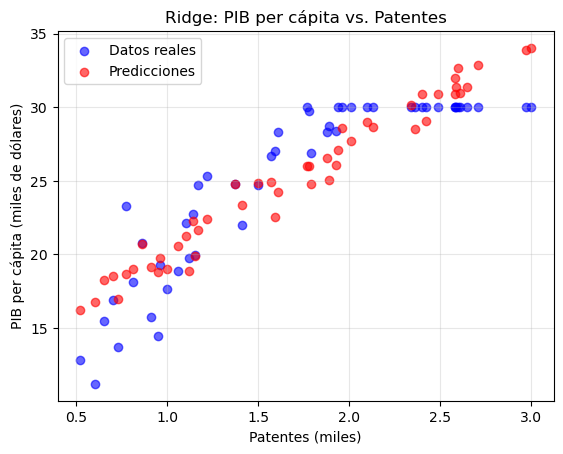

In [12]:
# Visualizar (para Patentes) 
plt.scatter(X['Patentes'], y, color='blue', alpha=0.6, label='Datos reales') 
plt.scatter(X['Patentes'], y_pred, color='red', alpha=0.6, label='Predicciones') 
plt.title('Ridge: PIB per cápita vs. Patentes') 
plt.xlabel('Patentes (miles)')  
plt.ylabel('PIB per cápita (miles de dólares)')  
plt.legend()  
plt.grid(True, alpha=0.3)  
plt.show() 

### 7.4 Clustering como Modelo No Supervisado 

En la sección 8.3, exploramos métodos supervisados (OLS, LASSO, Ridge) que predicen una variable objetivo a partir de datos etiquetados. Sin embargo, en economía, a menudo enfrentamos datos sin etiquetas, donde el objetivo es descubrir estructuras ocultas, como segmentar mercados o agrupar países por desarrollo económico. El aprendizaje no supervisado, y en particular el “clustering”, aborda este desafío al identificar grupos de observaciones similares basados en sus características.
El clustering agrupa datos en clústeres sin necesidad de una variable objetivo, asumiendo que observaciones similares comparten propiedades comunes. Uno de los algoritmos más utilizados es K-Means, que asigna cada observación a uno de “k” clústeres minimizando la varianza dentro de cada grupo. Sus aplicaciones en economía incluyen:
 
- Segmentación de mercados: Agrupar consumidores por patrones de compra.
- Clasificación de economías: Identificar países con perfiles económicos similares (por ejemplo, basados en PIB, innovación, comercio).
- Análisis exploratorio: Detectar patrones en datos económicos complejos.
 
K-Means requiere estandarizar las variables (dado que es sensible a la escala) y elegir el número óptimo de clústeres “k”, a menudo mediante el método del “elbow”, que evalúa la varianza. 

A continuación, extendemos el ejemplo de la sección 8.3, usando un dataset de 50 años (1975-2024) con PIB per cápita, patentes e inversión en I+D. Aplicamos K-Means para agrupar los años en clústeres según su perfil económico, visualizando los resultados y seleccionando un “k”óptimo.

##### **Ejemplo: Segmentación de Años por Indicadores Económicos con K-Means** 

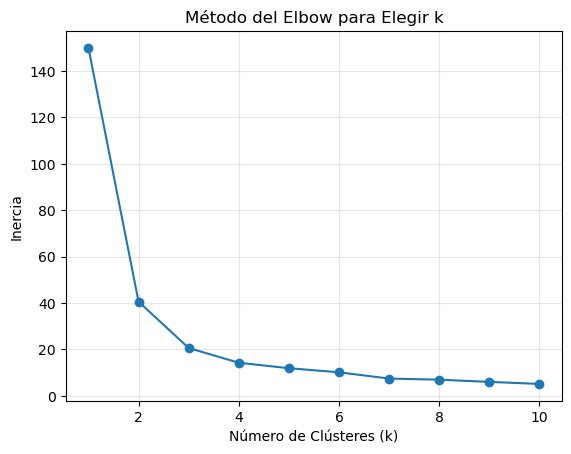

In [23]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler 

# Generar datos ficticios: PIB per cápita, Patentes, Inversión I+D 
np.random.seed(42)  

n = 50 
años = list(range(1975, 2025))  
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)  
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)  
inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)  
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)  
pib_base = 10 + 0.4 * np.arange(n)  
pib_noise = np.random.normal(0, 1.5, n)  
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise 
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2) 

# Crear DataFrame 
data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id }) 

# Variables para clustering 
X = data[['PIB_per_capita', 'Patentes', 'Inversion_ID']] 

# Estandarizar 
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X) 

# Elegir k óptimo con el método del elbow 
inertias = []  

k_range = range(1, 11)  

for k in k_range:  
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X_scaled)  
    inertias.append(kmeans.inertia_) 
# Elbow plot 
plt.plot(k_range, inertias, marker='o')  
plt.title('Método del Elbow para Elegir k')  
plt.xlabel('Número de Clústeres (k)')  
plt.ylabel('Inercia') 
plt.grid(True, alpha=0.3)  
plt.show() 

In [26]:
# Aplicar K-Means con k=3 (suponiendo elección tras elbow) 
kmeans = KMeans(n_clusters=3, random_state=42)  
data['Cluster'] = kmeans.fit_predict(X_scaled) 
print(data["Cluster"])

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Cluster, dtype: int32


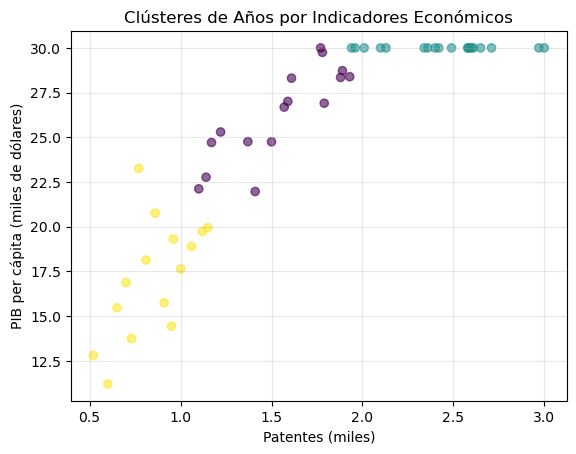

In [27]:
# Visualizar clústeres (PIB vs. Patentes) 
plt.scatter(data['Patentes'], data['PIB_per_capita'], c=data['Cluster'], cmap='viridis', alpha=0.6)  
plt.title('Clústeres de Años por Indicadores Económicos')  
plt.xlabel('Patentes (miles)') 
plt.ylabel('PIB per cápita (miles de dólares)')  
plt.grid(True, alpha=0.3)  
plt.show() 

In [28]:
# Resumen de clústeres 
print("Resumen de Clústeres:")  
print(data.groupby('Cluster')[['PIB_per_capita', 'Patentes', 'Inversion_ID']].mean().round(2))

Resumen de Clústeres:
         PIB_per_capita  Patentes  Inversion_ID
Cluster                                        
0                 26.28      1.54        214.13
1                 30.00      2.44        299.73
2                 17.20      0.85        135.20
